# Functionality: generate simulated 2-d locations of all channels

 <ul>
  <li>M1: 96 channels, SMATha: 27 channels, base on the channel information in <a href = "../../../pipeline/1_dataAnaly/FCAnaly/0_chnBrainarea/chn_brainArea_M1ThaSMA.csv">chn_brainArea.csv</a> generated by <a href = "0_chnBrainarea.ipynb"> 0_chnBrainarea.ipynb</a>
      )
  </li>
    
   <li>save to <b>chn_brainArea_simCoord.csv</b> in corresponding folder (simulated coordinates of the 5 channels were filled with (0,0))</li>
</ul> 

## Packages import

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from decimal import Decimal

import pandas as pd

import pickle
import os, sys

import IPython

In [4]:
# import_nbmodule used for import package in .ipynb
import import_nbmodule

# extract the exp folder path
currfolder = os.getcwd()
codefolder = currfolder[0 : currfolder.find('code')+len('code')]

# add path the exp folder
sys.path.append(codefolder)

# importfunction in util/folder_extract.pynb 
from util.folder_extract import exp_subfolders, code_corresfolder

from util.gen_pointcluster import genpointcluster_circle, genpointcluster_less4

## exp subfolders

In [5]:
datafolder, codefolder, pipelinefolder, _= exp_subfolders()

## nb_name

In [6]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [7]:
nb_name = nb_name[0: nb_name.find('.ipynb')]

## Load chn_brainarea information

In [8]:
folder_chnBrainarea = os.path.join(pipelinefolder, '1_dataAnaly', 'FCAnaly', '0_chnBrainarea')
file_chnBrainarea = os.path.join(folder_chnBrainarea, 'chn_brainArea.csv')

df = pd.read_csv(file_chnBrainarea, header = 0)

brainarea = df['brainarea']

## Simulated Coordinates

In [9]:
# simulated x, y coordinates (np.ndarray, (npoints,2)) of all channels
chnInf_simulatedCoord = np.zeros((len(brainarea), 2))

### Simulate coordinates of M1 channels

In [10]:
chnInf_simulatedCoord[brainarea == 'M1', :] = genpointcluster_circle(rs = [0.02, 0.04, 0.06, 0.08], ns = [3, 17, 31, 45], center = [0, 0])

### Simulate coordinates of ThaSMA channels 

In [11]:
x0, y0 = -0.15, -0.15

x_space, y_space = 0.1, 0.05

y_min = y0

#### first layer:SMA

In [12]:
"""
    first layer: SMA
"""

## lSMA ##

area = 'lSMA'

# parameters setup for lSMA
x_lSMA, y_lSMA = x0, y0
xy_lefttop = (x_lSMA, y_lSMA)

# generate coord_points of lSMA
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord



## rSMA ##

area = 'rSMA'

# parameters setup for rSMA
x_rSMA, y_rSMA = x_lSMA + x_space, y_lSMA
xy_lefttop = (x_rSMA, y_rSMA)

# generate coord_points of rSMA
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord

#### second layer: lMC

In [13]:
"""
    second layer: lMC
"""

## lMC ##

area = 'lMC'

# parameters setup for lMC
x_lMC, y_lMC = x0, y_min - y_space
xy_lefttop = (x_lMC, y_lMC)

# generate coord_points of lMC
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord

#### third layer: VA

In [14]:
"""
    third layer: VA
"""

## lVA ##

area = 'lVA'

# parameters setup for lVA
x_lVA, y_lVA = x0, y_min - y_space
xy_lefttop = (x_lVA, y_lVA)

# generate coord_points of lVA
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord


## rVA ##

area = 'rVA'

# parameters setup for rVA
x_rVA, y_rVA = x_lVA + x_space, y_lVA
xy_lefttop = (x_rVA, y_rVA)

# generate coord_points of rVA
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord

#### fourth layer: VLo

In [15]:
"""
    fourth layer: VLo
"""

## lVLo ##

area = 'lVLo'

# parameters setup for lVLo
x_lVLo, y_lVLo = x0, y_min - y_space
xy_lefttop = (x_lVLo, y_lVLo)

# generate coord_points of lVLo
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord



## rVLo ##

area = 'rVLo'

# parameters setup for rVLo
x_rVLo, y_rVLo = x_lVLo + x_space, y_lVLo
xy_lefttop = (x_rVLo, y_rVLo)

# generate coord_points of rVLo
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord

#### fifth layer: VPLo

In [16]:
"""
    fifth layer: VPLo
"""

## lVPLo ##

area = 'lVPLo'

# parameters setup for lVPLo
x_lVPLo, y_lVPLo = x0, y_min - y_space
xy_lefttop = (x_lVPLo, y_lVPLo)

# generate coord_points of lVPLo
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord



## rVPLo ##

area = 'rVPLo'

# parameters setup for rVPLo
x_rVPLo, y_rVPLo = x_lVPLo + x_space, y_lVPLo
xy_lefttop = (x_rVPLo, y_rVPLo)

# generate coord_points of rVPLo
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord

#### Sixth layer: rCd

In [17]:
"""
    sixth layer: rCd
"""

## rCd ##

area = 'rCd'

# parameters setup for rCd
x_rCd, y_rCd = x0 + x_space, y_min - y_space
xy_lefttop = (x_rCd, y_rCd)

# generate coord_points of rCd
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord

## Save 

In [18]:
# save folder is the corresponding folder in pipelinefolder
savefolder = code_corresfolder(os.getcwd(), nb_name)

filename = 'chn_brainArea_simCoord_M1ThaSMA.csv'

savefile = os.path.join(savefolder, filename)

In [19]:
# assign chnInf_simulatedCoord
df['simulated_x'], df['simulated_y'] = chnInf_simulatedCoord[:,0], chnInf_simulatedCoord[:,1]

In [20]:
df.to_csv(savefile, index = False)


## Plot

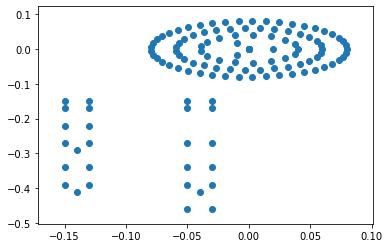

In [21]:
fig, ax = plt.subplots()

ax.scatter(chnInf_simulatedCoord[:,0], chnInf_simulatedCoord[:,1])